In [13]:
import random
from itertools import compress

class Item:
    def __init__(self, name, weight, price) -> None:
        self.name = name
        self.weight = weight
        self.price = price 

class Individual:
    counter = 0
    
    @classmethod
    def set_items(cls, items):  #아이템 변수 지정
        cls.items = items
    
    @classmethod
    def set_max_weight(cls, max_weight):   #최대 무게 설정
        cls.max_weight = max_weight
    
    @classmethod
    def create_random(cls):
        return Individual([random.choice([0, 1]) for _ in range(len(cls.items))])  #물건을 가방에 넣을지 판단
    
    def __init__(self, gene_list) -> None:
        self.gene_list = gene_list
        self.fitness = self.fitness_function()
        self.__class__.counter += 1
    
    def total_price(self):
        return sum([i.price for i in list(compress(self.__class__.items, self.gene_list))])  #compress는 gene_list에서 1인 물건만 추출하여 가격을 합산
    
    def total_weight(self):
        return sum([i.weight for i in list(compress(self.__class__.items, self.gene_list))])  #compress는 gene_list에서 1인 물건만 추출하여 무게을 합산
    
    def fitness_function(self):
        if self.total_weight() > self.__class__.max_weight:  #최대 무게 초과시 0 리턴
            return 0
        else:
            return self.total_price()  #적합도 계산(물건의 가격)
    
    def __str__(self):
        return f'gene: {self.gene_list}, price: {self.total_price()}, weight: {self.total_weight()}'
    
    def plot_info(self):
        print(f'Included: {[i.name for i in list(compress(self.__class__.items,self.gene_list))]}')
        print(f'Fitness: {self.fitness}')
        print(f'Price: {self.total_price()}')
        print(f'Weight: {self.total_weight()}')

In [14]:
import random
if __name__ == '__main__':
    random.seed(13)
    items = [
        Item('laptop', 3, 300),
        Item('book', 2, 15),
        Item('radio', 1, 30),
        Item('tv', 6, 230),
        Item('potato', 5, 7),
        Item('brick', 3, 1),
        Item('bottle', 1, 2),
        Item('camera', 0.5, 280),
        Item('smartphone', 0.1, 500),
        Item('picture', 1, 170),
        Item('flower', 2, 5),
        Item('chair', 3, 4),
        Item('watch', 0.05, 500),
        Item('boots', 1.5, 30),
        Item('radiator', 5, 25),
        Item('tablet', 0.5, 450),
        Item('printer', 4.5, 170)
    ]
    Individual.set_items(items)
    Individual.set_max_weight(10)
    ind = Individual.create_random()
    ind.plot_info()


Included: ['laptop', 'book', 'flower', 'watch', 'tablet']
Fitness: 1270
Price: 1270
Weight: 7.55


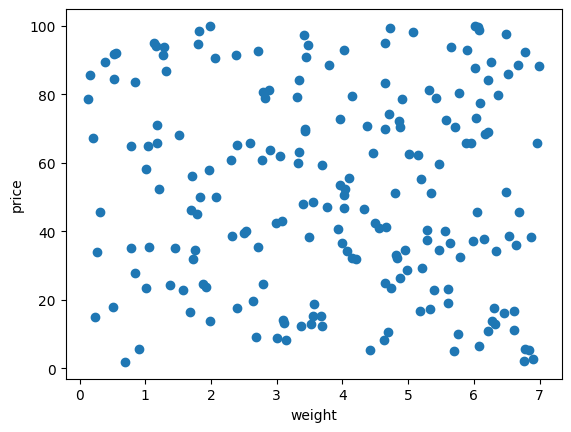

In [38]:
# 200개의 물건
import random
import matplotlib.pyplot as plt

def random_set_generator(min_price, max_price, min_weight, max_weight, total_number):
    l = []
    for i in range(total_number):  
        a = Item(f'Item#{i}', random.uniform(min_weight, max_weight),random.uniform(min_price, max_price))
        l.append(a)
    return l
if __name__ == '__main__':
    random.seed(15)
    items = random_set_generator(1, 100, 0.1, 7, 200)  #최소 가격, 최대 가격, 최소 무게, 최대 무게, 아이템 개수
    plt.scatter([i.weight for i in items], [i.price for i in items])
    plt.xlabel('weight')
    plt.ylabel('price')
    plt.show()


In [ ]:
import random

if __name__ == '__main__':
    #random.seed(1)
    items = random_set_generator(1, 100, 0.1, 7, 200)
    Individual.set_items(items)  #아이템 변수 지정
    Individual.set_max_weight(10)  #최대 무게 설정
    population = [Individual.create_random() for _ in range(1000)]  #1000개의 개체 생성
    average_weight = sum([ind.total_weight() for ind in population]) /len(population)
    print(f'Average weight of population: {average_weight}')
#결과를 보면 평균 무게가 최대 무게 보다 너무 높음
#그럼 사용할수 없는 개체가 많아짐

Average weight of population: 342.78693149983286


In [ ]:
import random

def create_random_individual(gene_len, zeros = 1, ones = 1):  #0의 비율을 올리기 위한 함수
    s = ([0] * zeros) + ([1] * ones)
    return Individual([random.choice(s) for _ in range(gene_len)])
if __name__ == '__main__':
    random.seed(1)
    items = random_set_generator(1, 100, 0.1, 7, 200)
    Individual.set_items(items)
    Individual.set_max_weight(10)
    population = [create_random_individual(len(items), 50, 1) for _ in range(1000)]  #50:1 확률로 1을 생성
    average_weight = sum([ind.total_weight() for ind in population]) /len(population)
    print(f'Average weight of population: {average_weight}')

#결과를 보면 평균 무게가 최대 무게 보다 낮아짐
#그럼 사용할수 있는 개체가 많아짐

7.9052025778010755
Average weight of population: 13.855059041278013


Best individual: 802.3740868900151


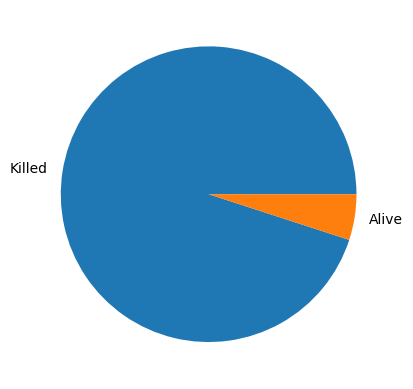

In [ ]:
import random
import matplotlib.pyplot as plt
import copy

def mutation_bit_flip(ind):
    mut = copy.deepcopy(ind)
    pos = random.randint(0, len(ind) - 1)
    g1 = mut[pos]
    mut[pos] = (g1 + 1) % 2
    return mut

def mutate(ind):
    mutated_gene = mutation_bit_flip(ind.gene_list)
    return Individual(mutated_gene)

if __name__ == '__main__':
    random.seed(63)
    items = random_set_generator(1, 100, 0.1, 7, 200)
    Individual.set_items(items)
    Individual.set_max_weight(10)
    gene_set = [0] * len(items)
    inclusions = [2, 30, 34, 42, 48, 64, 85, 104, 113, 119, 157, 174]
    for i in inclusions:
        gene_set[i] = 1
        ind = Individual(gene_set)
        alive = 0
        killed = 0
    for _ in range(1000):
        mutated = mutate(ind)
        if mutated.fitness == 0:
            killed += 1
        else:
            alive += 1
print(f'Best individual: {ind.fitness}')
labels = 'Killed', 'Alive'
sizes = [killed, alive]
plt.pie(sizes, labels = labels)
plt.show ()
#ㅗ

In [ ]:
def crossover_fitness_driven_one_point(p1, p2):
    point = random.randint(1, len(p1) - 1) #교차 지섬 선택
    c1, c2 = copy.deepcopy(p1), copy.deepcopy(p2)
    c1[point:], c2[point:] = p2[point:], p1[point:] #교차
    return [c1, c2]

def crossover(parent1, parent2):
    return crossover_fitness_driven_one_point(parent1, parent2)

def mutate(ind):
    return mutation_fitness_driven_bit_flip(ind, max_tries = 3)

def select(population):
    return selection_rank_with_elite(population, elite_size = 2)

items = random_set_generator(1, 100, 0.1, 7, 200)
a = Individual.set_items(items)
Individual.set_max_weight(10)

POPULATION_SIZE = 100
CROSSOVER_PROBABILITY = .7
MUTATION_PROBABILITY = .2
MAX_GENERATIONS = 50

first_population = [create_random_individual(len(items), zeros = 30) for _ in range(POPULATION_SIZE)] 
population = first_population.copy()
fitness_list = [ind.fitness for ind in population]
fit_avg = [sum(fitness_list) / len(population)]
fit_best = [max(fitness_list)]
fit_best_ever = [max(fitness_list + fit_best)]
best_ind = random.choice(first_population)
generation_number = 0
while generation_number < MAX_GENERATIONS:
    generation_number += 1
    offspring = select(population)

    crossed_offspring = crossover_operation(offspring, crossover, CROSSOVER_PROBABILITY)
    mutated_offspring = mutation_operation(crossed_offspring, mutate, MUTATION_PROBABILITY)
    
    population = mutated_offspring.copy()
    
    best_ind, fit_avg, fit_best, fit_best_ever = stats(population, best_ind, fit_avg, fit_best, fit_best_ever)

    plot_stats(fit_avg, fit_best_ever, "General Knapsack Problem")

print(f'Best Fitness: {best_ind.fitness}')
print(f'Total Number of Individuals: {Individual.counter}')

None


NameError: name 'selection_rank_with_elite' is not defined